<a href="https://colab.research.google.com/github/Soohyun13/MID6/blob/jeongtae/Mid_pr13_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1  멋사 데이버 분석 4기   / 제 6팀  -  이정태   - 미드 프로젝트

In [ ]:
 '''  준비된 데이터 셋에서 학업 성취도 향상에 관계 깊은 요인을 찾아 본다.
  청소년 학업 성취도에 영향을 미치는 요소를 시각화에 집중하고  분석 한다.
  국가별 학생 성적 평균의 추적은 무의미하며
  부모의 학습 참여(ParentAnsweringSurvey,ParentschoolSatisfaction,)와
  학생의 수업 참여 태도 (raisedhands,VisITedResources,AnnouncementsView,Discussion 질문참여,토론,공지사항,온라인소스, )
  해당 학생의 수업 참여도와  성적의 상관 관계'''



'   양부모 VS 편부모 각 세대의  청소년 학업 성취도의 상관 관계를 분석함으로써 살펴 보고자 한다.  \n분석 방법 및 도구  :    학교 만족도와 학교 평점, 공지 사항 조회 횟수로  편부모 세대를 구분하려 한다. \n\n양부모 라 하더라도 자녀에 관심도는 엄마가 주로 할 테인데 \n\n 편모와의 차별화를 데이터 셋에서 확인이 어떻게 가능할까  ? '

https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data/data    

학생들의 학업 성취도에 영향을 주는 요인을 파악하는 것은 교육 분야의 중요한 사회문제 분석 주제입니다. 이를 위해 포르투갈의 두 개 고등학교 학생들을 대상으로 수집된 공개 CSV 데이터셋을 활용할 수 있습니다. 이 데이터셋에는 학생들의 시험 점수(성적)와 함께 인구통계, 가정 환경, 학교 생활 등 다양한 특성이 포함되어 있어 학생 성적에 영향을 미치는 요인을 분석할 수 있습니다 (). 예를 들어, 공부 시간이나 부모의 교육 수준 같은 변수가 최종 성적에 미치는 영향을 상관분석을 통해 탐색하거나, 주어진 특성들로부터 시험 성적을 예측하는 간단한 모델(회귀 분석 등)을 만들어볼 수 있습니다.

In [ ]:
결론 : 핵생의 수업태도와 부모의 학교에 대한 관심도가  학생의 좋은 성적에 영향을 준다.

학생 수업 태도 참고 : 결석일수 ,토론,질문과 답변 , 공지사항 읽기 , 학습 참고 사이트 방문 및 검색
학부모의 적극적 참여  : 요인으로는 학습통지문 응담과 , 학교 만족도    부모의 보살핌이  좋은 성적에 영향을 준다.



### 2, 데이터 분석  EDA

In [ ]:
#데이트 세트 로딩

from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/xAPI-Edu-Data.csv')



### 2- 데이트셋의 컬럼(헤드) 분석

''' 학교 데이터 셋은 14개국의 청소년들의 학업 성취도 관련 자료이다.
    거주지를 보면 중동 지역에 90% 몰려 있다.
가설 :국가 간의 차이를 보이는가 ? ( F )

지역적, 개인적 차이를 객관화 할 수 있는 특성은 발견하지 못하였고
학습 성취도에 영향을 미치는 부모의 관심이 중요하다는 것을 발견하였다.

 가설 : 부모의 관심도는 학업 성취도에 영향을 끼치는가 ?  ( T )
 가설 : 학생의 수업 태도가 성적에 영향을 끼치는가 ?   ( T )



In [ ]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# 데이터 기본 정보 확인
df.head()  # 상위 5개 행 출력
df.info()  # 데이터 타입 및 결측치 확인
df.describe()  # 수치형 데이터의 통계 정보 출력




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

' 학교 데이터 셋은 14개국의 청소년들의 학업 성취도 관련 자료이다.\n    거주지를 보면 중동 지역에 90% 몰려 있다.\n지역적, 개인적 차이를 객관화 할 수 있는 특성은 발견하지 못하였고\n학습 성취도에 영향을 미치는 부모의 관심이 중요하다는 것을 발견하였다.\n\n 가설 : 부모의 관심도는 학업 성취도에 영향을 미친다. (T)\n\n\n\n채택하여 참조한 것은 (  )이고  ,참고 한 것중에 태도에 관해서 유의미한 결과가\n나왔고 이에따라 적극적인 동기부여를 교사의 지도가 필요하다고 생각한다.\n\n자의적 노력과 흥미유발을 위한 학습 프로그램 개발이 필요하다.\n\n\n 채택하지 않은 것(  ) 중에는 이런 것들이 있다.\n 하지만, 상관관계가 없어 보인다.'

### 3-1 참여 국가별 학생의 분포 확인

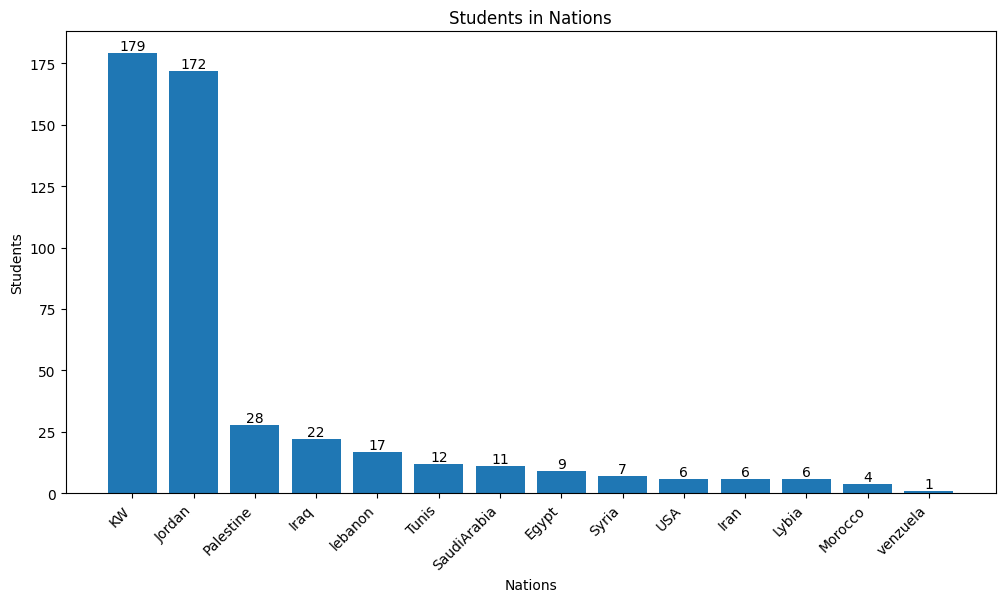

In [ ]:
# 막대 그래프 생성
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
bars = plt.bar(nationality_counts.index, nationality_counts.values)
plt.xlabel("Nations")  # x축 레이블 설정
plt.ylabel("Students")  # y축 레이블 설정
plt.title("Students in Nations")  # 그래프 제목 설정
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전

# 막대 위에 숫자 표현
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.show()  # 그래프 출력

### 3-2   참여 국가의 시각화

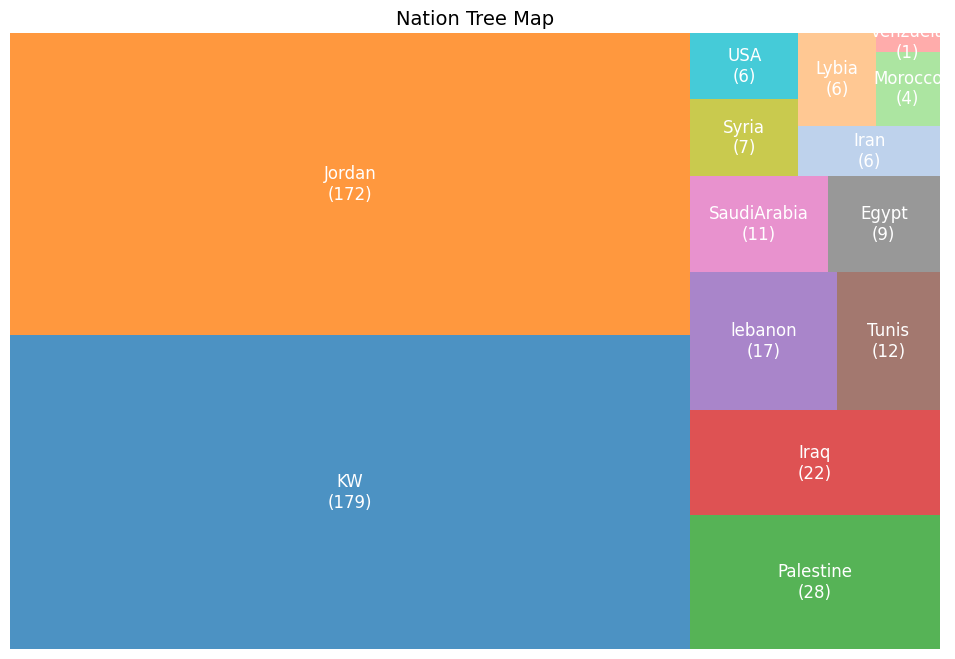

In [ ]:
 !pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# 국가별 학생 수 계산
nationality_counts = df['NationalITy'].value_counts()

# 트리맵 생성
plt.figure(figsize=(12, 8))
ax = squarify.plot(sizes=nationality_counts.values,
                  label=[f"{label}\n({count})" for label, count in nationality_counts.items()],
                  alpha=.8,
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                         '#aec7e8', '#ffbb78', '#98df8a', '#ff9896'], # Example colors (adjust as needed)
                  text_kwargs={'fontsize': 12, 'color': 'white'})  # Set text color to white
# text_kwargs is used to pass keyword arguments to the text objects of the treemap
plt.title("Nation Tree Map", fontsize=14)  # Increase title font size for better readability
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# NationalITy 열에서 국가별 학생 수 계산
nationality_counts = df['NationalITy'].value_counts()

### 3-3 국가별 학생 성적 분포

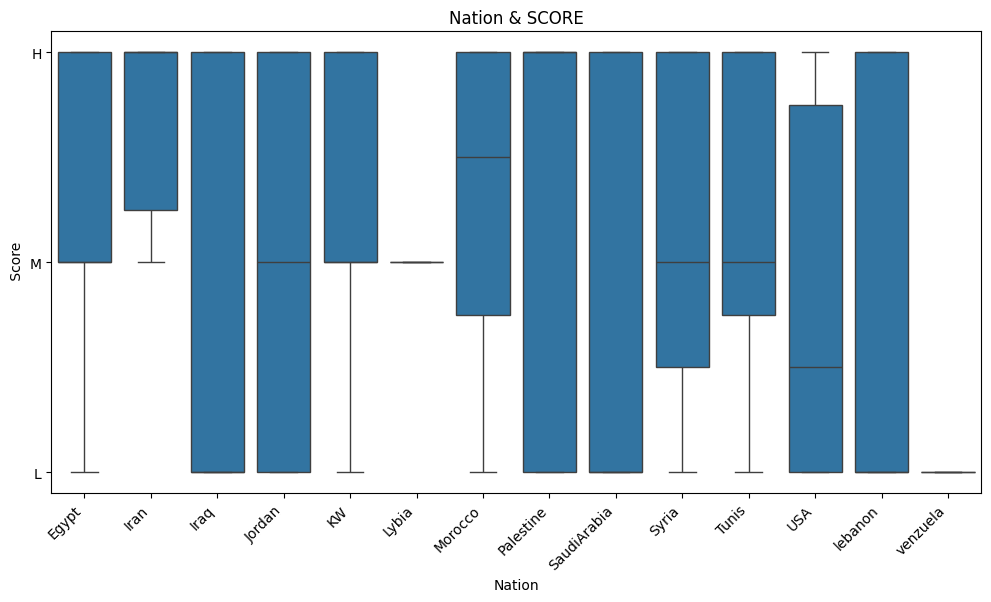

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# 출신국과 성적의 관계를 boxplot으로 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x="NationalITy", y="Class", data=df, order=sorted(df['NationalITy'].unique()))
plt.title("Nation & SCORE")
plt.xlabel("Nation")
plt.ylabel(" Score")
plt.xticks(rotation=45, ha='right')  # x축 레이블 가독성을 위해 회전

# y축 레이블 변경 (H, M, L)
plt.yticks(plt.yticks()[0], ['H', 'M', 'L'])

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# 성적 관련 컬럼: 'Class' (학생 성적, H/M/L)
# 다른 컬럼들과의 관계를 분석하여 성적과 관련 있는 컬럼을 찾습니다.
# 예시로 'raisedhands' (수업 중 손을 든 횟수) 컬럼을 사용합니다.
grade_related_column = 'raisedhands'

### 토론 참여도와 성적간의 비교

<ipython-input-16-ee868154b6f8>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_grades = df.groupby('Discussion_Group')['Class'].apply(lambda x: (x == 'H').mean()) # H 비율 계산


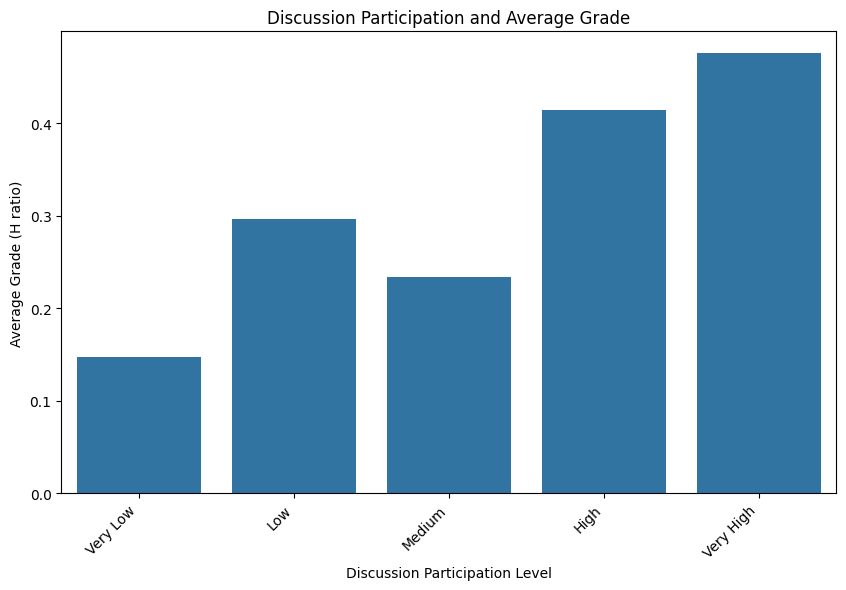

In [ ]:
discussion_data = df['Discussion']
class_data = df['Class']

# Discussion 데이터를 구간화하여 범주형 변수로 변환 (예: 5개 구간)
df['Discussion_Group'] = pd.cut(discussion_data, bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Discussion_Group과 Class를 기준으로 평균 성적 계산
average_grades = df.groupby('Discussion_Group')['Class'].apply(lambda x: (x == 'H').mean()) # H 비율 계산


plt.figure(figsize=(10, 6))
sns.barplot(x=average_grades.index, y=average_grades.values)
plt.title("Discussion Participation and Average Grade")
plt.xlabel("Discussion Participation Level")
plt.ylabel("Average Grade (H ratio)")
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.show()

### 가설 : 손을 듦은 성적에 영향을 끼치는가 ?

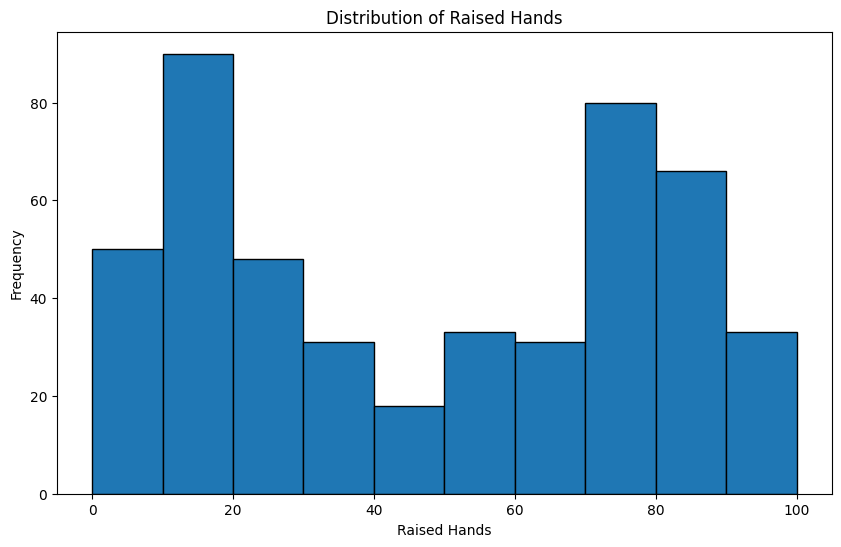

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# raisedhands 열 선택
raisedhands_data = df['raisedhands']

# 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(raisedhands_data, bins=10, edgecolor='black')  # bins는 구간 개수를 지정합니다.
plt.title('Distribution of Raised Hands')
plt.xlabel('Raised Hands')
plt.ylabel('Frequency')
plt.show()

### 온라인 리소스 방문 횟수와 성적


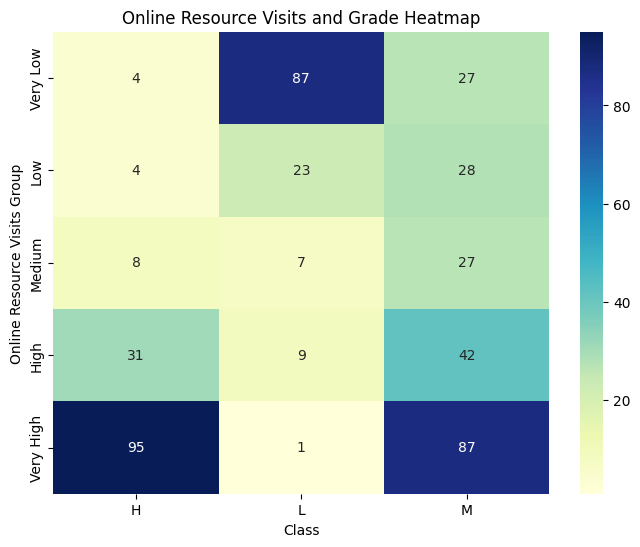

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# 온라인 리소스 방문 횟수와 성적 열 선택
online_resource_visits_col = 'VisITedResources'
student_grade_col = 'Class'

# 히트맵 생성을 위한 데이터 변환
# 온라인 리소스 방문 횟수 데이터를 구간화하여 범주형 변수로 변환 (예: 5개 구간)
df['online_resource_visits_group'] = pd.cut(df[online_resource_visits_col], bins=5,
                                           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# online_resource_visits_group과 Class를 기준으로 데이터 개수를 집계하여 히트맵 데이터 생성
heatmap_data = pd.crosstab(df['online_resource_visits_group'], df[student_grade_col])

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Online Resource Visits and Grade Heatmap")
plt.xlabel("Class")
plt.ylabel("Online Resource Visits Group")
plt.show()

###     손들기를 잘하는 학생의 성적


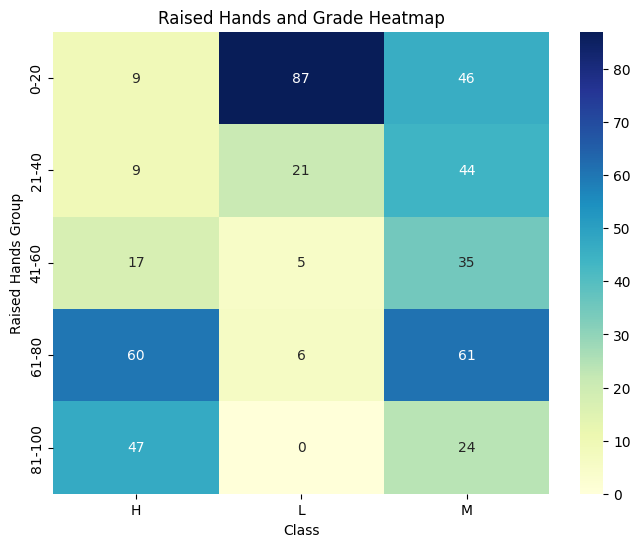

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# raisedhands 열과 Class 열 선택
raisedhands_data = df['raisedhands']
class_data = df['Class']

# 히트맵 생성을 위한 데이터 변환
# raisedhands 데이터를 구간화하여 범주형 변수로 변환
df['raisedhands_group'] = pd.cut(raisedhands_data, bins=[0, 20, 40, 60, 80, 100],
                                 labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# raisedhands_group과 Class를 기준으로 데이터 개수를 집계하여 히트맵 데이터 생성
heatmap_data = pd.crosstab(df['raisedhands_group'], class_data)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Raised Hands and Grade Heatmap")
plt.xlabel("Class")
plt.ylabel("Raised Hands Group")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

## 새 섹션  학부모의 학교 참여도와 학생 성적

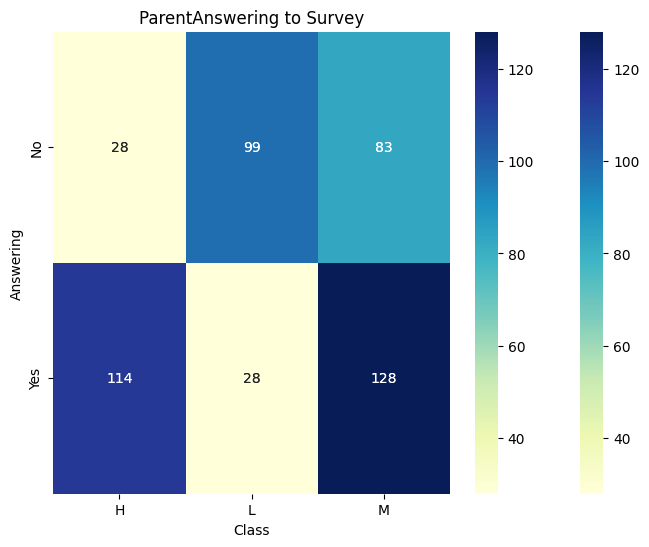

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# 부모 의견 참여도와 학생 성적 열 선택
parent_participation_col = 'ParentAnsweringSurvey'  # 부모 의견 참여도 열
student_grade_col = 'Class'  # 학생 성적 열

# 히트맵 생성을 위한 데이터 변환
heatmap_data = pd.crosstab(df[parent_participation_col], df[student_grade_col])

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d", xticklabels=['H', 'M', 'L'])  # Specify xticklabels here
plt.title("ParentAnswering to Survey")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("ParentAnswering to Survey")
plt.xlabel("Class")

plt.ylabel("Answering")

plt.show()

## **  학생 관리에 집중하는 부모의 성별과 학생의 성적 관계  **

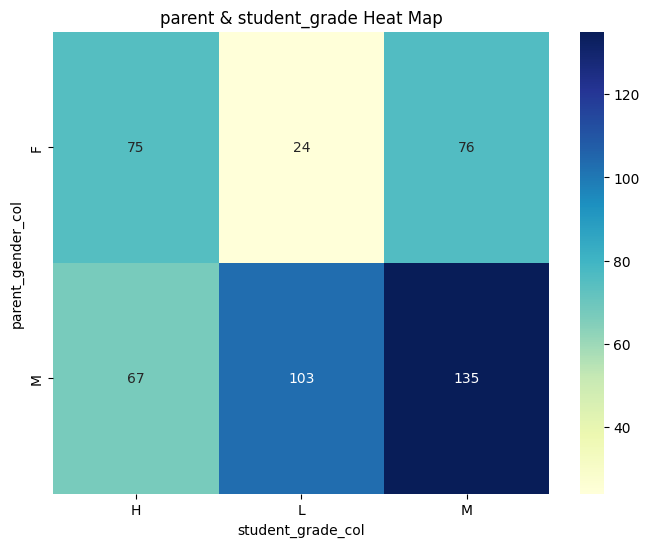

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# 부모 성별과 학생 성적 열 선택
parent_gender_col = 'gender'  # 부모 성별 열 (데이터셋에 따라 열 이름이 다를 수 있습니다.)
student_grade_col = 'Class'  # 학생 성적 열

# 히트맵 생성을 위한 데이터 변환
heatmap_data = pd.crosstab(df[parent_gender_col], df[student_grade_col])

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("parent & student_grade Heat Map")
plt.xlabel("student_grade_col")
plt.ylabel("parent_gender_col")
plt.show()